# Telco Customer Churn -
### Business Data Analysis with Python

This notebook covers data exploration, preprocessing, classification modeling, and evaluation using the Telco Customer Churn dataset.

##  Data Exploration and Preprocessing

We will load the dataset, explore the features, check for missing values, and prepare the data for modeling.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub


# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)
# Load dataset

df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display first 5 rows
print(df.head())



Path to dataset files: /kaggle/input/telco-customer-churn
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  Te

In [ ]:
# Data info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check missing values
print(df.isnull().sum())



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Describe numeric columns
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


#Before you move forward , carefully understand the descriptives, different columns and the data.

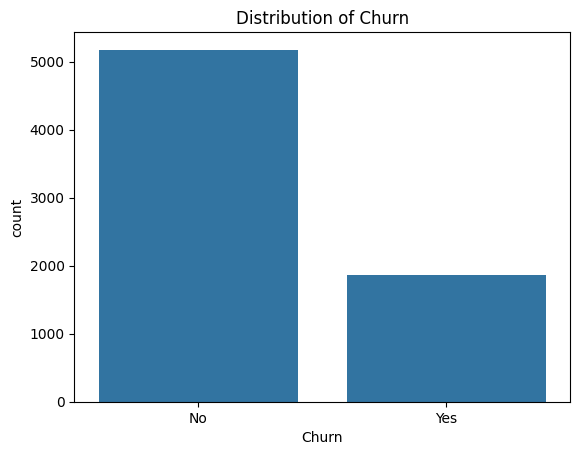

In [ ]:

# Distribution of churn
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

In [ ]:
#Write one to two lines of interpretation of the above Churn Chart



In [ ]:
# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Converts the TotalCharges column to numeric type (floats).
#If any values cannot be converted (e.g., empty strings or invalid text), they are set to NaN (errors='coerce').
# Fill missing TotalCharges with median


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)



TypeError: Cannot convert ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] to numeric

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'customerID':  # exclude customerID
        df[col] = le.fit_transform(df[col])
#Imports LabelEncoder from scikit-learn to convert categorical text data into numeric labels.
#Iterates over all columns with data type object (typically strings).
#Skips the customerID column because it’s an identifier, not a feature.
#Applies label encoding to each categorical column, converting each unique text value into a numeric code. This is necessary for most ML models that require numeric input.
# Check the transformed dataframe
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


## Classification using Logistic Regression

Train a logistic regression model to predict customer churn.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



What is your understanding of Logistic regression? Write the answer in below box

In [ ]:
#What is logistic regression

In [ ]:
# Define features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# X represents the features (independent variables) used for prediction in the machine learning model.
# y represents the target variable (dependent variable) that the model aims to predict.




#Why are we droping "customerID and "Churn" ?

In [ ]:

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Here, 0.2 means 20% of the data will be set aside for testing the model’s performance after training.
#random_state=42 , This parameter controls the randomness of the data splitting process to ensure reproducibility.
#By setting a fixed number (like 42), every time you run the code, the train-test split will be exactly the same.
#If not set, the split would be different each time, making results harder to reproduce.


In [ ]:

# Initialize logistic regression
model = LogisticRegression(max_iter=1000)
#max_iter=1000 means the logistic regression algorithm will try up to 1000 iterations to find the best-fit parameters before stopping.
#model = LogisticRegression() prepares a logistic regression classifier that you can train on your data to predict binary (or multinomial) target outcomes based on input features.




In [ ]:
# Train the model
model.fit(X_train, y_train)



ValueError: could not convert string to float: 'Female'

In [ ]:
# Predict on test
y_pred = model.predict(X_test)



In [ ]:
# Evaluate model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8161816891412349


In [ ]:
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[935 101]
 [158 215]]


|                         | **Predicted No Churn (0)** | **Predicted Churn (1)** |
| ----------------------- | -------------------------- | ----------------------- |
| **Actual No Churn (0)** | 938 (True Negatives)       | 98 (False Positives)    |
| **Actual Churn (1)**    | 160 (False Negatives)      | 213 (True Positives)    |

True Negatives (TN) = 938: Customers who did not churn and were correctly predicted as not churning.

False Positives (FP) = 98: Customers who did not churn but were incorrectly predicted as churners (Type I error).

False Negatives (FN) = 160: Customers who churned but were incorrectly predicted as not churning (Type II error).

True Positives (TP) = 213: Customers who churned and were correctly predicted as churners.



In [ ]:
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



| Metric        | Meaning                                                    |
| ------------- | ---------------------------------------------------------- |
| **Precision** | **Out of all predicted positives, how many were correct**      |
| **Recall**    | Out of all actual positives, how many were correctly found |
| **F1-score**  | Harmonic mean of precision and recall (balance of both)    |
| **Support**   | Number of actual occurrences of each class                 |


##Class 0 (No churn):##
Precision = 0.85: When the model predicts no churn, it’s correct 85% of the time.

Recall = 0.91: It correctly identifies 91% of the actual no-churn customers.

F1-score = 0.88: Good balance between precision and recall for no churn.

Support = 1036: There are 1036 actual no-churn cases in the test set.


##Class 1 (Churn):##
Precision = 0.68: When the model predicts churn, it’s correct 68% of the time.

Recall = 0.57: It correctly identifies 57% of the actual churners.

F1-score = 0.62: Moderate balance for churn prediction, with recall being relatively low.

Support = 373: There are 373 actual churn cases in the test set.

##Overall Metrics:##
Accuracy = 0.82: The model correctly predicts churn/no churn in 82% of the cases overall.

Macro avg: Simple average across both classes (treats all classes equally).

Weighted avg: Average weighted by support (class size), gives more weight to the majority class (no churn).

#Translating results into business implications##
The model’s strong performance in identifying customers who do not churn helps maintain stable revenue by focusing retention efforts elsewhere. However, its lower recall for churners means many at-risk customers may go unnoticed, potentially leading to unexpected revenue loss. Improving churn detection is crucial for proactive customer retention strategies, reducing churn costs, and increasing long-term profitability. Balancing precision and recall will help allocate marketing resources efficiently and maximize customer lifetime value.

## Model Interpretation and Optional Clustering

Explore feature importance via coefficients and optionally apply K-Means clustering.

In [ ]:
# Feature importance from logistic regression coefficients
features = X.columns
importance = model.coef_[0]

for i,v in enumerate(importance):
    print(f'Feature: {features[i]}, Importance: {v:.3f}')


##Feature Importance Interpretation:##
**Gender: -0.053**
A small negative coefficient suggests that being male (or the encoded value representing male) slightly decreases the likelihood of churn compared to female, but the effect is minimal.

**SeniorCitizen: 0.174**
A positive coefficient indicates that senior citizens are more likely to churn than non-senior customers, with a moderate influence.

**Partner: 0.070**
Having a partner slightly increases the probability of churn, though the effect is relatively small.

**Dependents: -0.201**
A larger negative coefficient means customers with dependents are less likely to churn, indicating that family commitments may increase loyalty.

**Tenure: -0.034**
Negative coefficient implies that longer tenure (more months with the company) decreases churn likelihood, but the effect is small.

**Summary**
Positive values increase churn risk; negative values decrease it.

Dependents and tenure reduce churn risk the most here.

SeniorCitizen status is the strongest positive predictor of churn among these features.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
print(df[['gender', 'gender_encoded']].head())


In [ ]:

# Optional: KMeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#It scales the features to have mean = 0 and standard deviation = 1.
#Standardization is important before clustering to ensure all features contribute equally.





In [ ]:
# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#The algorithm groups the data into 3 clusters based on similarity.
#random_state=42 ensures reproducible results.
#fit_predict() fits the model and assigns each data point to a cluster (0, 1, or 2).


In [ ]:

# Add cluster labels
df['cluster'] = clusters

#it adds Cluster Labels to DataFrame
#Each customer is labeled with a cluster number, enabling further analysis or profiling.

In [ ]:
# Plot clusters
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='cluster', data=df)
plt.title('Distribution of K-Means Clusters')
plt.show()

#Business Interpretation#
K-Means clustering segments customers into 3 distinct groups based on their attributes (e.g., demographics, services used).

Understanding cluster sizes and characteristics can help tailor marketing, retention, or service strategies for each group.

Clustering is unsupervised learning, so it finds natural groupings without using churn labels.



##How do we know cluster membership?##


In [ ]:
#After clustering, each customer is assigned a cluster label (e.g., 0, 1, 2), stored in df['cluster'].
#You can look up any customer’s cluster by checking this label.
df[['customerID', 'cluster']].head()


#Understanding clusters without pre-known labels#


In [ ]:
#Although K-Means doesn’t use the churn or any label in clustering,
#it groups customers based on similarity across all features you provide (all columns in X).
#To understand what defines each cluster, you:
#Calculate summary statistics per cluster:
df.groupby('cluster').mean()


In [ ]:
# Select all numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'customerID' from the columns to calculate mean because it is an identifier, not a numeric feature
cols_to_mean = [col for col in numeric_cols if col != 'customerID']

# Calculate and print the mean values of numeric features for each cluster group
# Provide the 'cluster' column as a Series to groupby
print(df[cols_to_mean].groupby(df['cluster']).mean())

## Additional PCA Analysis
In this section, we apply Principal Component Analysis (PCA) to reduce dimensionality and visualize the data.
This helps to understand patterns and separability of churn classes in lower dimensions.

In [ ]:
# Import PCA and StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)



In [ ]:
# Create a DataFrame with PCA components
import pandas as pd
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Churn'] = y.reset_index(drop=True)  # Add target for coloring

# Plot PCA scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=pca_df, palette='Set1')
plt.title('PCA of Telco Customer Churn Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Optional: PCA features can be used for clustering or further modeling

### Additional Practice Suggestions:
- Experiment with different classifiers such as Random Forest, Decision Tree, or SVM.
- Tune hyperparameters using GridSearchCV.
- Explore feature engineering and data balancing techniques.
- Try clustering with different cluster numbers and analyze results.
- Visualize relationships between features and churn.